# AutoVisionAI Training Notebook

### UNet Training and Inference

In [ ]:
from autovisionai.models.unet.unet_trainer import UnetTrainer
from autovisionai.train import train_model

model = UnetTrainer()
train_model(exp_number=3, model=model, batch_size=4, max_epochs=200, epoch_patience=5, 
            use_resize=False, use_random_crop=True, use_hflip=True)

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir C:\DATA\Projects\AutoVisionAI\experiments

In [45]:
from autovisionai.utils.utils import get_input_image_for_inference
from autovisionai.models.unet.unet_inference import model_inference
from autovisionai.utils.utils import show_pic_and_pred_semantic_mask
from autovisionai.configs.config import CONFIG
import confuse
from pathlib import Path
from PIL import Image


# Provide a path to model.pt checkpoint of your trained model
experiment_number = 3
trained_model_path = Path(CONFIG["trainer"]["logs_and_weights_root"].get(confuse.Filename())) / f'exp_{experiment_number}/weights/model.pt'

# You may check your model performance with one of the image from dataset 
# or any other car image on your Google Drive
path_image = 'path/to/local/image'

# Or you also may check it with the any image in the internet
# url_to_image = 'url/to/internet/image'

# image = get_input_image_for_inference(local_path=path_to_local_image) 
# For example, let's take an image of C8:
c8_url = 'https://web-assets.net/cms-photos/2023/08/1st/107343/1.jpg'
image = get_input_image_for_inference(url=c8_url) 
# photo_path = r'C:\DATA\Projects\AutoVisionAI\data\images\0cdf5b5d0ce1_03.jpg'
# image = get_input_image_for_inference(local_path=photo_path)

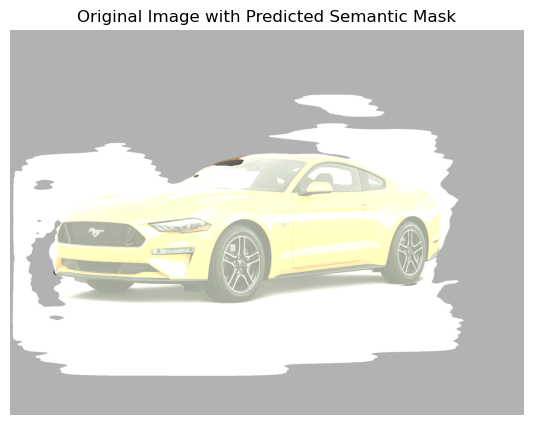

In [46]:
mask = model_inference(trained_model_path, image)

# Visualizing results
show_pic_and_pred_semantic_mask(image, mask, use_plt=True)

### FastSCNN Training and Inference

In [8]:
from autovisionai.models.fast_scnn.fast_scnn_trainer import FastSCNNTrainer
from autovisionai.train import train_model

model = FastSCNNTrainer()
train_model(exp_number=3, model=model, batch_size=4, max_epochs=200, epoch_patience=2, 
            use_resize=False, use_random_crop=False, use_hflip=True)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Proffesional\Miniconda3\envs\PyTorch\Lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:654: Checkpoint directory C:\DATA\Projects\AutoVisionAI\experiments\exp_3\weights exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | FastSCNN          | 1.1 M  | train
1 | criterion | BCEWithLogitsLoss | 0      | train
--------------------------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.543     Total estimated model params size (MB)
213       Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/loss_epoch improved. New best score: 1.470


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/loss_epoch improved by 1.435 >= min_delta = 0.0. New best score: 0.035


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/loss_epoch improved by 0.002 >= min_delta = 0.0. New best score: 0.033


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/loss_epoch improved by 0.002 >= min_delta = 0.0. New best score: 0.031


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/loss_epoch improved by 0.000 >= min_delta = 0.0. New best score: 0.030


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/loss_epoch improved by 0.000 >= min_delta = 0.0. New best score: 0.030


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/loss_epoch improved by 0.000 >= min_delta = 0.0. New best score: 0.030


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/loss_epoch improved by 0.000 >= min_delta = 0.0. New best score: 0.030


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val/loss_epoch improved by 0.000 >= min_delta = 0.0. New best score: 0.030


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val/loss_epoch did not improve in the last 2 records. Best score: 0.030. Signaling Trainer to stop.


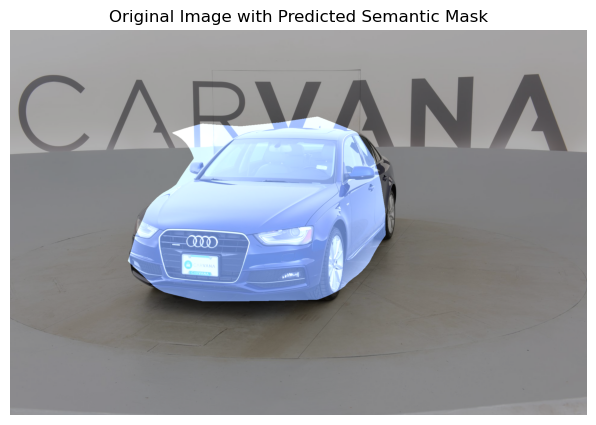

In [26]:
from autovisionai.utils.utils import get_input_image_for_inference
from autovisionai.models.fast_scnn.fast_scnn_inference import model_inference
from autovisionai.utils.utils import show_pic_and_pred_semantic_mask
from autovisionai.configs.config import CONFIG
import confuse
from pathlib import Path


experiment_number = 3
trained_model_path = Path(CONFIG["trainer"]["logs_and_weights_root"].get(confuse.Filename())) / f'exp_{experiment_number}/weights/model.pt'
path_image = r'C:\DATA\Projects\AutoVisionAI\tests\test_data\images\0cdf5b5d0ce1_02.jpg'

# c8_url = 'https://cdn.datasetninja.com/previews/q/ext:jpeg/resize:fill:400:0:0/q:70/plain/supervisely-supervisely-assets-public/images/original/g/t/4L/WgTu29UqCqmyIU2hojgUQpfgWW6jEAunCU4nbF3edKOdHcfyo5jHvwZWrmYSS2LF249AfKduR09cQIytf48wgeS56O4dG4D6i0LF4bIGIynq7fgsogUOYD47pMnp.jpg'
# image = get_input_image_for_inference(url=c8_url) 
image = get_input_image_for_inference(local_path=path_image)
mask = model_inference(trained_model_path, image)
show_pic_and_pred_semantic_mask(image, mask, use_plt=True)

Have to be trained more and for more data, but as this model only for demonstration and Carvana dataset too shallow, will leave this result as is for now. The main purpose was achived - the pipeline of train and inference through PyTorch Lightning works fine. 

In [38]:
import numpy as np
import os
import torch

data_root = CONFIG['dataset']['data_root'].get()
mask_path = os.path.join(data_root, CONFIG['dataset']['masks_folder'].get(), os.listdir(os.path.join(data_root, CONFIG['dataset']['masks_folder'].get()))[1])
mask_path

'C:\\DATA\\Projects\\AutoVisionAI\\data\\masks\\03a857ce842d_01.png'

In [39]:

mask = Image.open(mask_path)
mask = torch.tensor(np.array(mask), dtype=torch.uint8).unsqueeze(0)
mask

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)

In [ ]:
def find_bounding_box(mask):

    rows = torch.any(mask != 0, dim=1)
    cols = torch.any(mask != 0, dim=0)
    nz_rows = torch.nonzero(rows)
    nz_cols = torch.nonzero(cols)
    return torch.tensor(
        [
            nz_rows[0][1].item(),  # First row's index
            nz_cols[0][0].item(),  # First col's index
            nz_rows[-1][1].item(),  # Last row's index
            nz_cols[-1][0],  # Last col's index
        ],
        dtype=torch.float32,
    )

In [63]:
a = find_bounding_box(mask)

a

tensor([[ 314,  981],
        [ 314,  982],
        [ 314,  983],
        ...,
        [1053, 1091],
        [1053, 1092],
        [1053, 1093]])